In [19]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
# 2. Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1yXG1DETrBHogViDHB0qnMQqGlUzmENW1"
input_df = pd.read_excel(url, header = 0, index_col = 0,nrows=744)
input_df.head()

,HH:MM (LST),Zenith (deg),ETR (Wh/m^2)
YYYY-MM-DD,,,
2010-01-01,01:00:00,99.0,0
2010-01-01,02:00:00,99.0,0
2010-01-01,03:00:00,99.0,0
2010-01-01,04:00:00,99.0,0
2010-01-01,05:00:00,99.0,0


In [ ]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,HH:MM (LST),Zenith (deg),ETR (Wh/m^2)
YYYY-MM-DD,,,
2010-01-31,20:00:00,99.0,0
2010-01-31,21:00:00,99.0,0
2010-01-31,22:00:00,99.0,0
2010-01-31,23:00:00,99.0,0
2010-01-31,1900-01-01 00:00:00,99.0,0


In [ ]:
# 4. Получение базовых статистических показателей
input_df.describe()

,Zenith (deg),ETR (Wh/m^2)
count,744.000000,744.000000
mean,86.670968,193.705645
std,15.234433,273.090662
min,55.500000,0.000000
25%,72.775000,0.000000
50%,99.000000,0.000000
75%,99.000000,419.000000
max,99.000000,798.000000


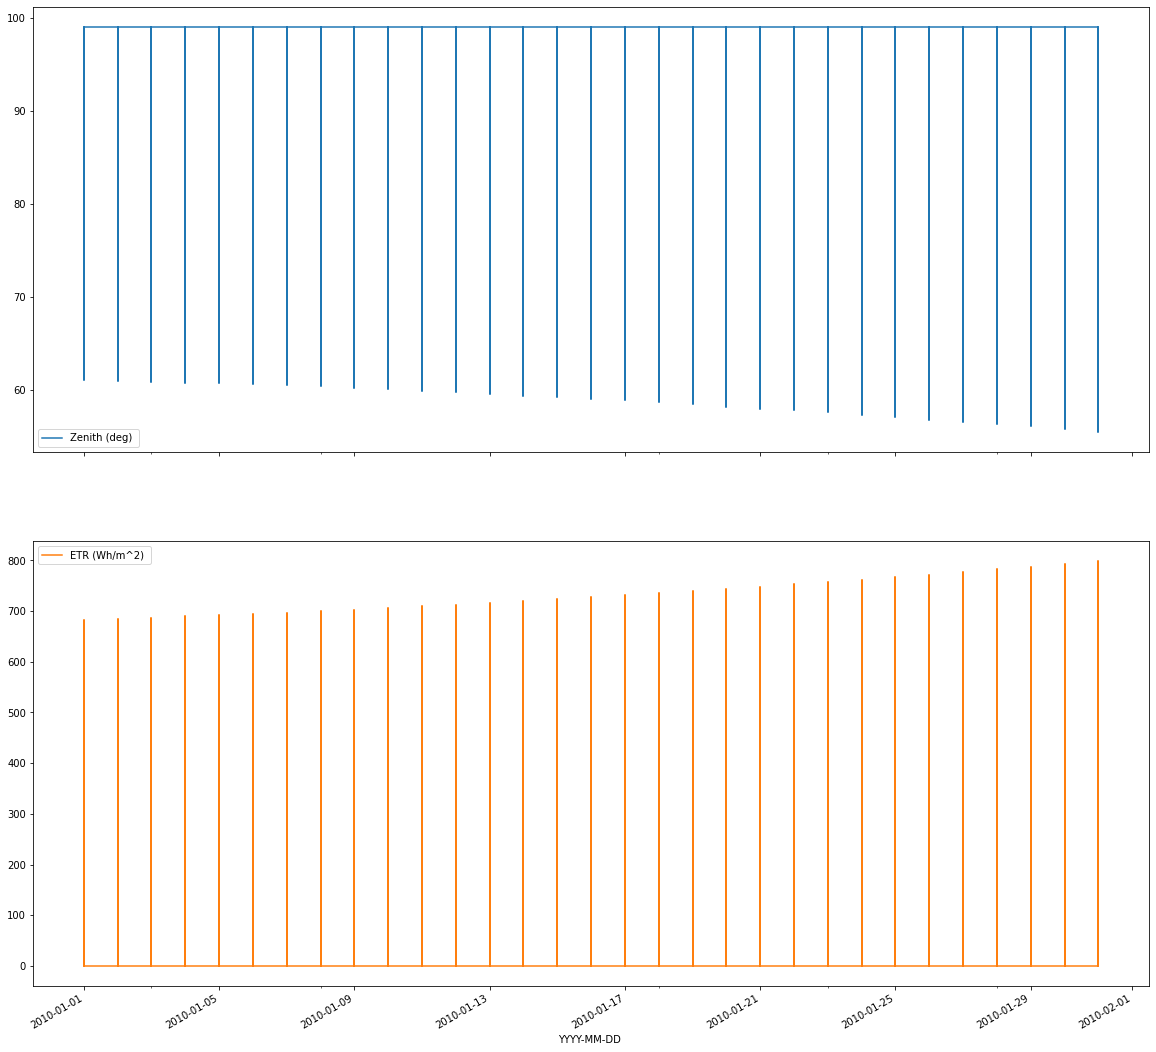

In [ ]:
# 5. 
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

In [22]:
# 6
input_matrix = input_df.values # перевод таблицы в матрицу
print('размерность матрицы', input_matrix.shape)
print()
h = []
for i in range (0, 744):
    vr = input_matrix[i, 2]
    h.append(vr)
print(h)



размерность матрицы (744, 3)

[0, 0, 0, 0, 0, 0, 0, 5, 164, 376, 540, 645, 683, 652, 553, 394, 186, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 164, 376, 541, 647, 685, 654, 556, 397, 189, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 164, 376, 542, 648, 687, 657, 559, 400, 193, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 164, 377, 543, 650, 690, 660, 562, 404, 196, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 164, 377, 544, 652, 692, 662, 565, 407, 200, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 164, 378, 546, 653, 694, 665, 569, 411, 204, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 165, 379, 547, 656, 697, 669, 572, 415, 207, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 165, 380, 549, 658, 700, 672, 576, 419, 211, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 166, 382, 551, 660, 703, 675, 580, 423, 216, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 167, 383, 553, 663, 706, 679, 584, 427, 220, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 168, 385, 555, 666, 709, 682, 588, 

In [23]:
print("{: <12} max = {:.2f}".format(input_df.columns[2], input_matrix[ :  , 2].max()))
print("{: <12} mean = {:.2f}".format(input_df.columns[2], input_matrix[ :  , 2].mean()))

ETR (Wh/m^2)  max = 798.00
ETR (Wh/m^2)  mean = 193.71


In [40]:
a =[] #среднее значение за месяц
b=[h[0]] #массив за сутки
for j in range(1, 744):
    if j % 24 == 0:
      sr = sum(b) / len(b)  # среднее значение за сутки
      a.append(sr) # заносим значение в массив а
      b = [] #зануляем массив
      b.append(h[j]) #добавляет в массив средних значений
    else:
        b.append(h[j])
t = []
for n in range(0, len(a)):
    t.append(n) #массив времени




In [25]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
p = figure(plot_width = 800, plot_height = 400) 
output_notebook()
p.line(np.arange(len(t)), a, line_width = 2, color = 'green') 
show(p)

In [41]:
M=[] #максимальное значения за месяц
b=[h[0]] #массив за сутки
for j in range(1, 744):
    if j % 24 == 0:
        b.sort() #отсортировал массив b от мин до макс
        M.append(b[len(b)-1]) #загнал в массив M последнее(макс) значение массива b
        b = [] # занулил массив b
        b.append(h[j]) 
    else:
        b.append(h[j])




In [27]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
p = figure(plot_width = 800, plot_height = 400) # Создание объекта для построения графика
output_notebook()
p.line(np.arange(len(t)), M, line_width = 2, color = 'blue')
show(p)

In [34]:
# 
data_frame = pd.DataFrame(a)
data_frame.to_excel('a.xlsx', index = False)

In [35]:
# 
data_frame = pd.DataFrame(M)
data_frame.to_excel('M.xlsx', index = False)